# Q2
# 1) Extract reviews of any product from ecommerce website like amazon
#2) Perform emotion mining


Import Libraries

In [101]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Multi-page web-scraping

In [102]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/OnePlus-Nord-Pastel-128GB-Storage/dp/B0BY8JZ22K/?_encoding=UTF8&ref_=dlx_gate_sd_dcl_tlt_cd684552_dt_pd_gw_unk&pd_rd_w=kSwBf&content-id=amzn1.sym.9e4ae409-2145-4395-aa6e-45d7f3e95c3e&pf_rd_p=9e4ae409-2145-4395-aa6e-45d7f3e95c3e&pf_rd_r=8YCDPTSMH1WKVY2JVHVM&pd_rd_wg=FFe9W&pd_rd_r=a2110d5',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

# Looping through multiple pages

In [103]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [104]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [105]:
for x in tqdm_notebook(range(160)):

    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Pastel-128GB-Storage/product-reviews/B0BY8JZ22K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [150]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNeed good battery & bloat ...,4.0,If you need a good phone with good battery lif...,Reviewed in India on 8 November 2023
1,4.0 out of 5 stars\nFantastic Phone with Impre...,4.0,I recently upgraded to the OnePlus Nord CE 3 L...,Reviewed in India on 17 August 2023
2,3.0 out of 5 stars\nNot very impressed,3.0,"I went with the brand name, but slightly disap...",Reviewed in India on 8 March 2024
3,4.0 out of 5 stars\nNice,4.0,This phone is totally worthy and best for game...,Reviewed in India on 3 March 2024
4,4.0 out of 5 stars\nOnePlus Nord CE 3 5G - A P...,4.0,The OnePlus Nord CE 3 5G is a device that does...,Reviewed in India on 29 October 2023
...,...,...,...,...
1595,4.0 out of 5 stars\nSimply awesome and never s...,4.0,Friends i would have definitely given five sta...,Reviewed in India on 8 February 2024
1596,"4.0 out of 5 stars\nGood phone,Best Camera",4.0,Slightly disappointed with battery backup and ...,Reviewed in India on 30 January 2024
1597,"4.0 out of 5 stars\nGreat product, great featu...",4.0,"The phone is really good, works well.Just one ...",Reviewed in India on 31 January 2024
1598,4.0 out of 5 stars\nREVIEW AFTER USING THE PHO...,4.0,Phone comes with an LCD display in the budget ...,Reviewed in India on 1 March 2024


In [107]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [108]:
df.head(50)

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNeed good battery & bloat ...,4.0,If you need a good phone with good battery lif...,8 November 2023
1,4.0 out of 5 stars\nFantastic Phone with Impre...,4.0,I recently upgraded to the OnePlus Nord CE 3 L...,17 August 2023
2,3.0 out of 5 stars\nNot very impressed,3.0,"I went with the brand name, but slightly disap...",8 March 2024
3,4.0 out of 5 stars\nNice,4.0,This phone is totally worthy and best for game...,3 March 2024
4,4.0 out of 5 stars\nOnePlus Nord CE 3 5G - A P...,4.0,The OnePlus Nord CE 3 5G is a device that does...,29 October 2023
5,4.0 out of 5 stars\nSimply awesome and never s...,4.0,Friends i would have definitely given five sta...,8 February 2024
6,"4.0 out of 5 stars\nGood phone,Best Camera",4.0,Slightly disappointed with battery backup and ...,30 January 2024
7,"4.0 out of 5 stars\nGreat product, great featu...",4.0,"The phone is really good, works well.Just one ...",31 January 2024
8,4.0 out of 5 stars\nREVIEW AFTER USING THE PHO...,4.0,Phone comes with an LCD display in the budget ...,1 March 2024
9,4.0 out of 5 stars\nProduct review after 1 mon...,4.0,"Well, I'm writing my review on this product af...",19 February 2024


In [109]:
df.to_csv("Review.csv")

# Load Dataset

In [110]:
reviews = pd.read_csv('Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNeed good battery & bloat ...,4.0,If you need a good phone with good battery lif...,8 November 2023
1,4.0 out of 5 stars\nFantastic Phone with Impre...,4.0,I recently upgraded to the OnePlus Nord CE 3 L...,17 August 2023
2,3.0 out of 5 stars\nNot very impressed,3.0,"I went with the brand name, but slightly disap...",8 March 2024
3,4.0 out of 5 stars\nNice,4.0,This phone is totally worthy and best for game...,3 March 2024
4,4.0 out of 5 stars\nOnePlus Nord CE 3 5G - A P...,4.0,The OnePlus Nord CE 3 5G is a device that does...,29 October 2023
...,...,...,...,...
1595,4.0 out of 5 stars\nSimply awesome and never s...,4.0,Friends i would have definitely given five sta...,8 February 2024
1596,"4.0 out of 5 stars\nGood phone,Best Camera",4.0,Slightly disappointed with battery backup and ...,30 January 2024
1597,"4.0 out of 5 stars\nGreat product, great featu...",4.0,"The phone is really good, works well.Just one ...",31 January 2024
1598,4.0 out of 5 stars\nREVIEW AFTER USING THE PHO...,4.0,Phone comes with an LCD display in the budget ...,1 March 2024


# Data Exploration

In [111]:
reviews.Rating.describe()

count    1600.000000
mean        3.900000
std         0.300094
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Rating, dtype: float64

In [112]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1600 non-null   object 
 1   Rating       1600 non-null   float64
 2   Review       1600 non-null   object 
 3   Review_Date  1600 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.1+ KB


In [113]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [114]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nNeed good battery & bloat ...,4.0,If you need a good phone with good battery lif...,8 November 2023
1,4.0 out of 5 stars\nFantastic Phone with Impre...,4.0,I recently upgraded to the OnePlus Nord CE 3 L...,17 August 2023
2,3.0 out of 5 stars\nNot very impressed,3.0,"I went with the brand name, but slightly disap...",8 March 2024
3,4.0 out of 5 stars\nNice,4.0,This phone is totally worthy and best for game...,3 March 2024
4,4.0 out of 5 stars\nOnePlus Nord CE 3 5G - A P...,4.0,The OnePlus Nord CE 3 5G is a device that does...,29 October 2023


# Data Visualization

# Date vs Review Count

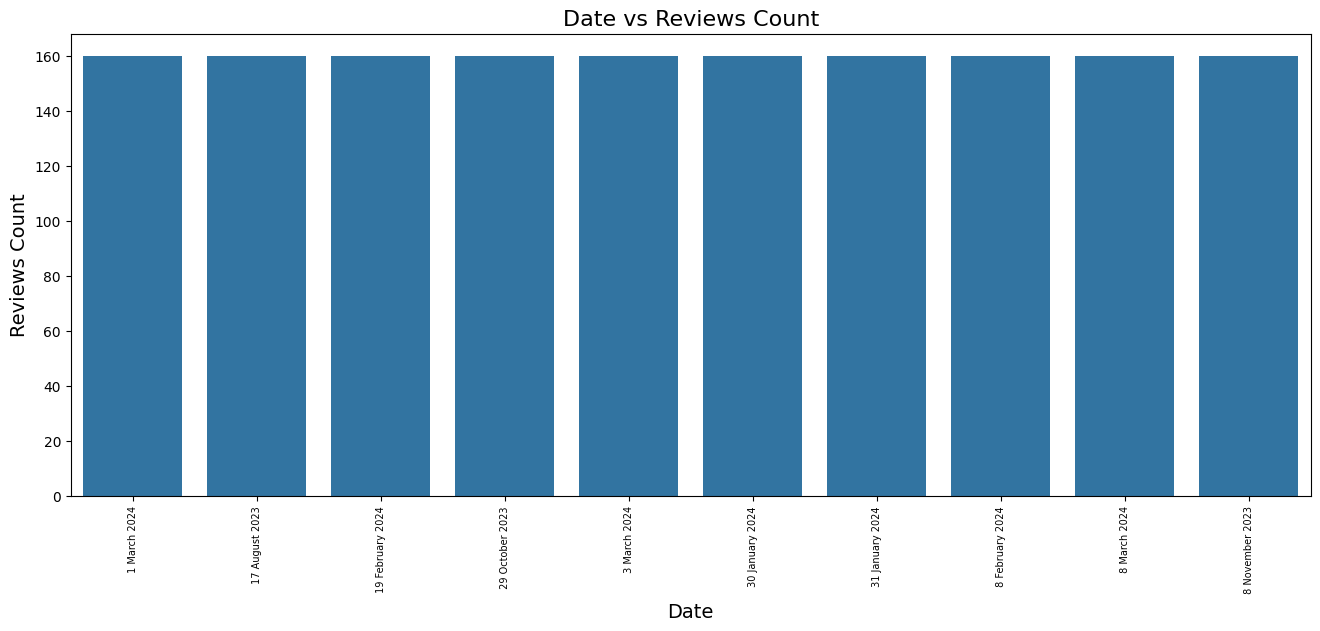

In [115]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

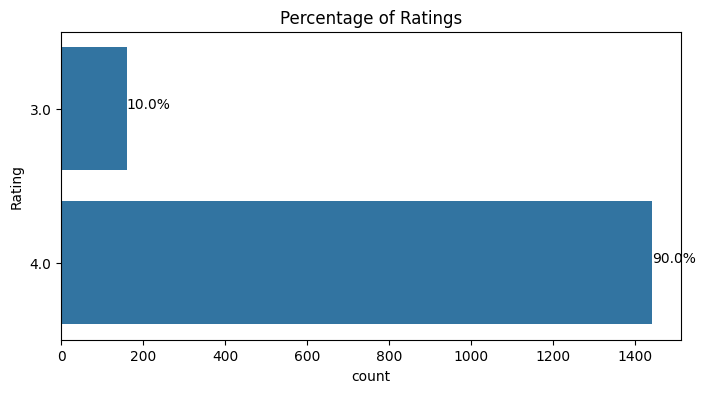

In [116]:
plt.figure(figsize=(8,4))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# BasicText Preprocessing for Sentiment Analysis

In [117]:
oneplus_review = reviews[['Review']]
oneplus_review

,Review
0,If you need a good phone with good battery lif...
1,I recently upgraded to the OnePlus Nord CE 3 L...
2,"I went with the brand name, but slightly disap..."
3,This phone is totally worthy and best for game...
4,The OnePlus Nord CE 3 5G is a device that does...
...,...
1595,Friends i would have definitely given five sta...
1596,Slightly disappointed with battery backup and ...
1597,"The phone is really good, works well.Just one ..."
1598,Phone comes with an LCD display in the budget ...


# Resetting index

In [118]:
oneplus_review.reset_index(drop=True, inplace=True)

In [119]:
import nltk
from nltk.corpus import stopwords

In [120]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
stop_words = stopwords.words('english')
oneplus_review['Review'] = oneplus_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [122]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(oneplus_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", oneplus_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [124]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": oneplus_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...


# Text Pre-processing Techniques

# Removing '@names'

In [125]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [126]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...
5,friend would definitely given five star howeve...,"friends would definitely given five star, howe..."
6,slightly disappointed battery backup hybrid sl...,slightly disappointed battery backup hybrid sl...
7,phone really good work well one issue clicking...,"the phone really good, works well.just one iss..."
8,phone come lcd display budget k miserableand c...,phone comes lcd display budget 20k miserablean...
9,well writing review product buying month ago p...,"well, i'm writing review product buying 1 mont..."


# Removing links (http | https)

In [127]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...
5,friend would definitely given five star howeve...,"friends would definitely given five star, howe..."
6,slightly disappointed battery backup hybrid sl...,slightly disappointed battery backup hybrid sl...
7,phone really good work well one issue clicking...,"the phone really good, works well.just one iss..."
8,phone come lcd display budget k miserableand c...,phone comes lcd display budget 20k miserablean...
9,well writing review product buying month ago p...,"well, i'm writing review product buying 1 mont..."


# Removing Review with empty text

In [128]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...
5,friend would definitely given five star howeve...,"friends would definitely given five star, howe..."
6,slightly disappointed battery backup hybrid sl...,slightly disappointed battery backup hybrid sl...
7,phone really good work well one issue clicking...,"the phone really good, works well.just one iss..."
8,phone come lcd display budget k miserableand c...,phone comes lcd display budget 20k miserablean...
9,well writing review product buying month ago p...,"well, i'm writing review product buying 1 mont..."


# Dropping duplicate rows

In [129]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...
5,friend would definitely given five star howeve...,"friends would definitely given five star, howe..."
6,slightly disappointed battery backup hybrid sl...,slightly disappointed battery backup hybrid sl...
7,phone really good work well one issue clicking...,"the phone really good, works well.just one iss..."
8,phone come lcd display budget k miserableand c...,phone comes lcd display budget 20k miserablean...
9,well writing review product buying month ago p...,"well, i'm writing review product buying 1 mont..."


# Function to remove emoji

In [130]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [131]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...
5,friend would definitely given five star howeve...,"friends would definitely given five star, howe..."
6,slightly disappointed battery backup hybrid sl...,slightly disappointed battery backup hybrid sl...
7,phone really good work well one issue clicking...,"the phone really good, works well.just one iss..."
8,phone come lcd display budget k miserableand c...,phone comes lcd display budget 20k miserablean...
9,well writing review product buying month ago p...,"well, i'm writing review product buying 1 mont..."


# Tokenize 'Clean_Reviews'

In [132]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['recently', 'upgraded', 'oneplus', 'nord', 'ce', 'lite', 'g', 'pastel', 'lime', 'thoroughly', 'impressed', 'performance', 'feature', 'love', 'pro', 'affordable', 'g', 'inclusion', 'g', 'capability', 'phone', 'price', 'point', 'huge', 'plus', 'streaming', 'downloading', 'content', 'lightning', 'fast', 'future', 'proofed', 'upcoming', 'advancement', 'connectivity', 'sleek', 'design', 'pastel', 'lime', 'color', 'unique', 'add', 'refreshing', 'touch', 'device', 'slim', 'profile', 'lightweight', 'build', 'make', 'comfortable', 'hold', 'use', 'extended', 'period', 'smooth', 'performance', 'gb', 'ram', 'multitasking', 'breeze', 'phone', 'handle', 'various', 'apps', 'task', 'simultaneously', 'without', 'lag', 'slowdown', 'ample', 'storage', 'gb', 'storage', 'provides', 'enough', 'room', 'apps', 'photo', 'video', 'plus', 'option', 'expand', 'storage', 'via', 'microsd', 'card', 'thoughtful', 'addition', 'impressive', 'display', 'amoled', 'display', 'offer', 'vibrant', 'color', 'deep', 

In [133]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [need, good, phone, good, battery, life, bloat...
1    [recently, upgraded, oneplus, nord, ce, lite, ...
2    [went, brand, name, slightly, disappointed, fe...
3    [phone, totally, worthy, best, game, camera, q...
4    [oneplus, nord, ce, g, device, disappoint, sea...
5    [friend, would, definitely, given, five, star,...
6    [slightly, disappointed, battery, backup, hybr...
7    [phone, really, good, work, well, one, issue, ...
8    [phone, come, lcd, display, budget, k, miserab...
9    [well, writing, review, product, buying, month...
Name: Clean_Reviews, dtype: object

In [134]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...,"[need, good, phone, good, battery, life, bloat..."
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...,"[recently, upgraded, oneplus, nord, ce, lite, ..."
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ...","[went, brand, name, slightly, disappointed, fe..."
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...,"[phone, totally, worthy, best, game, camera, q..."
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...,"[oneplus, nord, ce, g, device, disappoint, sea..."
5,friend would definitely given five star howeve...,"friends would definitely given five star, howe...","[friend, would, definitely, given, five, star,..."
6,slightly disappointed battery backup hybrid sl...,slightly disappointed battery backup hybrid sl...,"[slightly, disappointed, battery, backup, hybr..."
7,phone really good work well one issue clicking...,"the phone really good, works well.just one iss...","[phone, really, good, work, well, one, issue, ..."
8,phone come lcd display budget k miserableand c...,phone comes lcd display budget 20k miserablean...,"[phone, come, lcd, display, budget, k, miserab..."
9,well writing review product buying month ago p...,"well, i'm writing review product buying 1 mont...","[well, writing, review, product, buying, month..."


# Converting words to Stemmer

In [135]:
stemmer = SnowballStemmer("english")

In [136]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,need good phone good batteri life bloat free s...
1,recent upgrad oneplus nord ce lite g pastel li...
2,went brand name slight disappoint featur phone...
3,phone total worthi best game camera qualiti ne...
4,oneplus nord ce g devic disappoint seamless co...
...,...
1595,friend would definit given five star howev che...
1596,slight disappoint batteri backup hybrid slot m...
1597,phone realli good work well one issu click ima...
1598,phone come lcd display budget k miserableand c...


# Converting words to Lemma

In [137]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,need good phone good battery life bloat free s...
1,recently upgraded oneplus nord ce lite g paste...
2,went brand name slightly disappointed feature ...
3,phone totally worthy best game camera quality ...
4,oneplus nord ce g device disappoint seamlessly...
...,...
1595,friend would definitely given five star howeve...
1596,slightly disappointed battery backup hybrid sl...
1597,phone really good work well one issue clicking...
1598,phone come lcd display budget k miserableand c...


# Basic Feature Extaction

# Applying bag of Words without N grams

In [138]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [139]:
print(cv.get_feature_names_out()[109:200])

['ensures' 'equal' 'excellent' 'exceptional' 'exceptionally' 'expand'
 'expected' 'experience' 'extended' 'fantastic' 'fast' 'faster' 'fastly'
 'feature' 'feel' 'find' 'finger' 'fingerprint' 'five' 'flagship' 'free'
 'friend' 'friendly' 'front' 'full' 'functionality' 'future' 'game'
 'gamesgame' 'gaming' 'gb' 'genshin' 'get' 'gift' 'give' 'given' 'glass'
 'glitch' 'go' 'good' 'great' 'gud' 'handle' 'hd' 'heavy' 'help' 'hold'
 'hour' 'however' 'huge' 'hybrid' 'hz' 'ideal' 'image' 'impact'
 'impressed' 'impressive' 'improved' 'improvement' 'inclusion' 'increase'
 'interface' 'internal' 'intuitive' 'issue' 'juice' 'keep' 'lag' 'laggy'
 'last' 'lasting' 'lcd' 'le' 'left' 'lesser' 'life' 'light' 'lightning'
 'lightweight' 'like' 'lime' 'limited' 'line' 'lit' 'lite' 'long' 'look'
 'looking' 'love' 'low' 'magic']


In [140]:
print(cv.get_feature_names_out()[:100])

['accurate' 'accuratecooling' 'across' 'actually' 'add' 'added' 'addition'
 'advancement' 'affordable' 'ago' 'almost' 'also' 'amoled' 'amount'
 'ample' 'android' 'appearance' 'appreciate' 'approx' 'apps' 'area'
 'aspect' 'available' 'average' 'back' 'backed' 'backup' 'bad' 'bank'
 'based' 'battery' 'best' 'better' 'betterdoesn' 'bgmicharging' 'bit'
 'black' 'blindly' 'bloat' 'board' 'boast' 'brand' 'breaking' 'breeze'
 'browsing' 'budget' 'build' 'built' 'buying' 'camera' 'camerafinally'
 'camerascreen' 'capability' 'card' 'case' 'category' 'cause' 'ce'
 'charge' 'charger' 'charging' 'checked' 'choice' 'clarity' 'clean'
 'clicking' 'color' 'colour' 'combine' 'come' 'comfortable' 'commendable'
 'comparing' 'comparison' 'compelling' 'competitor' 'con' 'conclusion'
 'condition' 'conditionsfingerprint' 'connectivity' 'consumer'
 'consumption' 'content' 'continues' 'convenient' 'could' 'crisp'
 'customizable' 'day' 'decent' 'deep' 'definitely' 'delivers' 'design'
 'device' 'differ' 'differe

In [141]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [142]:
dataframe = dataframe.reset_index(drop=True)

In [143]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [144]:
corpus[3]

'phone total worthi best game camera qualiti need improv glitch red line charg batteri life gud long last batteri superfast charg worth buy oneplu phone amount like'

Applying Countvectorizer (Creating the Bag of Words model)

In [145]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [146]:
X.shape

(1600, 1546)

In [147]:
cv.get_feature_names_out()[:20]

array(['accur', 'accur provid', 'accur provid ad', 'accuratecool',
       'accuratecool technolog', 'accuratecool technolog optim', 'across',
       'across board', 'across board appear', 'actual', 'actual gift',
       'actual gift screen', 'ad', 'ad secur', 'ad secur make', 'add',
       'add refresh', 'add refresh touch', 'addit', 'addit impress'],
      dtype=object)

In [148]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [149]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,accur,accur provid,accur provid ad,accuratecool,accuratecool technolog,accuratecool technolog optim,across,across board,across board appear,actual,...,worth still,worth still like,worthi,worthi best,worthi best game,would,would definit,would definit given,write,write review
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Vectorizer

In [151]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [152]:
corpus[4]

'oneplu nord ce g devic disappoint seamlessli combin style function provid excel user experi across board appear appear nord ce sleek eleg slim design choic materi placement camera modul scream premium phone proud show eas use oneplu continu tradit provid clean user friendli interfac oxygeno intuit respons customiz navig app set breez make ideal tech savvi user new smartphon batteri life batteri life nord ce commend easili get full day moder heavi usag may best categori reliabl warp charg featur ensur quick top need fingerprint sensor fingerprint sensor devic fast accur provid ad secur make unlock phone breez sensor placement front conveni intuit summari oneplu nord ce g fantast rounder boast stylish appear except easi use offer reliabl batteri life featur respons fingerprint sensor look g phone deliv look perform nord ce excel choic'

# Applying TF-IDF Vectorizer

In [153]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [154]:
X.shape

(1600, 1546)

In [156]:
tfidf_v.get_feature_names_out()[:20]

array(['accur', 'accur provid', 'accur provid ad', 'accuratecool',
       'accuratecool technolog', 'accuratecool technolog optim', 'across',
       'across board', 'across board appear', 'actual', 'actual gift',
       'actual gift screen', 'ad', 'ad secur', 'ad secur make', 'add',
       'add refresh', 'add refresh touch', 'addit', 'addit impress'],
      dtype=object)

In [157]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [159]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,accur,accur provid,accur provid ad,accuratecool,accuratecool technolog,accuratecool technolog optim,across,across board,across board appear,actual,...,worth still,worth still like,worthi,worthi best,worthi best game,would,would definit,would definit given,write,write review
0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.072696,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
2,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.127549,0.127549,0.127549,0.00000,0.00000,0.00000,0.000000,0.000000
4,0.04961,0.04961,0.04961,0.000000,0.000000,0.000000,0.04961,0.04961,0.04961,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.09896,0.09896,0.09896,0.000000,0.000000
1596,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1597,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000
1598,0.00000,0.00000,0.00000,0.072664,0.072664,0.072664,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000


# Named Entity Recognition (NER)

In [160]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'need good phone good battery life bloat free software price get blindly phone built rock solid finger print reader side actually gift screen painful finger print reader side finger print unlocks faster screen onesbuy spigen case worth r making phone look like premium one increase virtual ram gb settingsget gb internal storage future good whats poor average camerascreen feel laggy timesit hz display reality hz recently upgraded oneplus nord ce lite g pastel lime thoroughly impressed performance feature love pro affordable g inclusion g capability phone price point huge plus streaming downloading content lightning fast future proofed upcoming advancement connectivity sleek design pastel lime color unique add refreshing touch device slim profile lightweight build make comfortable hold use extended period smooth performance gb ram multitasking breeze phone handle various apps task simultaneously without lag slowdown ample storage gb storage provides enough room apps photo video plus optio

# Parts Of Speech (POS) Tagging

In [161]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [162]:
for token in doc_block[:50]:
    print(token,token.pos_)

need VERB
good ADJ
phone NOUN
good ADJ
battery NOUN
life NOUN
bloat VERB
free ADJ
software NOUN
price NOUN
get VERB
blindly ADV
phone NOUN
built VERB
rock NOUN
solid ADJ
finger NOUN
print NOUN
reader NOUN
side NOUN
actually ADV
gift NOUN
screen NOUN
painful ADJ
finger NOUN
print NOUN
reader NOUN
side NOUN
finger NOUN
print NOUN
unlocks NOUN
faster ADV
screen NOUN
onesbuy NOUN
spigen NOUN
case NOUN
worth ADJ
r NOUN
making VERB
phone NOUN
look NOUN
like ADP
premium NOUN
one NUM
increase VERB
virtual ADJ
ram NOUN
gb PROPN
settingsget PROPN
gb PROPN


# Filtering the nouns and verbs only

In [163]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['enhancing', 'consumption', 'experience', 'hd', 'resolution', 'ensures', 'visuals', 'watching', 'video', 'browsing', 'web', 'camera', 'performance', 'camera', 'setup', 'decent', 'match', 'quality', 'flagship', 'device', 'photo', 'lit', 'condition', 'turn', 'performance', 'improved', 'plastic', 'back', 'keep', 'device', 'feel', 'glass', 'backed', 'phone', 'quality', 'case', 'help', 'mitigate', 'battery', 'life', 'battery', 'life', 'day', 'use', 'appreciate', 'bit', 'juice', 'usage', 'day', 'conclusion', 'offer', 'package', 'feature', 'price', 'option', 'user', 'want', 'experience', 'g', 'connectivity', 'breaking', 'bank', 'design', 'performance', 'display', 'quality', 'standout', 'feature', 'making', 'value', 'money', 'area', 'improvement', 'experience', 'phone', 'provides', 'went', 'brand', 'name', 'disappointed', 'feature', 'phone', 'brand', 'price', 'expected', 'battery', 'life', 'screen', 'resolution', 'usage', 'game', 'charge', 'morning', 'night', 'left', 'plus', 'point', 'chargin

# Counting the noun & verb tokens

In [164]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,phone,2880
1,battery,1920
2,life,1440
3,device,1440
4,performance,1120
5,camera,1120
6,display,960
7,feature,960
8,quality,960
9,experience,800


### Visualizing results (Barchart for top 10 nouns + verbs)


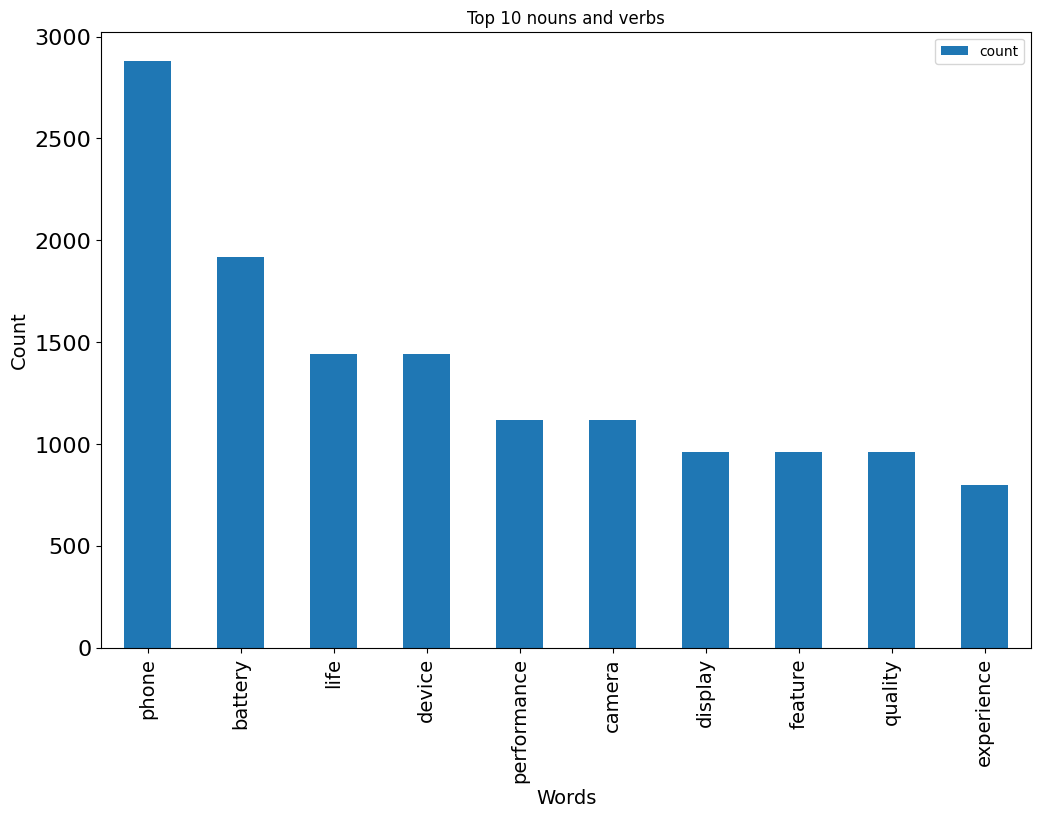

In [165]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Feature Extraction

BOW Features

In [166]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

TF-IDF Features

In [167]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch sentiments Using TextBlob

In [168]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [169]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1440
neg,160


# Let's calculate subjectivity and Polarity

In [170]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...,"[need, good, phone, good, battery, life, bloat...",0.430128,0.080769
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...,"[recently, upgraded, oneplus, nord, ce, lite, ...",0.561937,0.316441
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ...","[went, brand, name, slightly, disappointed, fe...",0.392460,0.066270
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...,"[phone, totally, worthy, best, game, camera, q...",0.314286,0.169048
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...,"[oneplus, nord, ce, g, device, disappoint, sea...",0.695455,0.453716


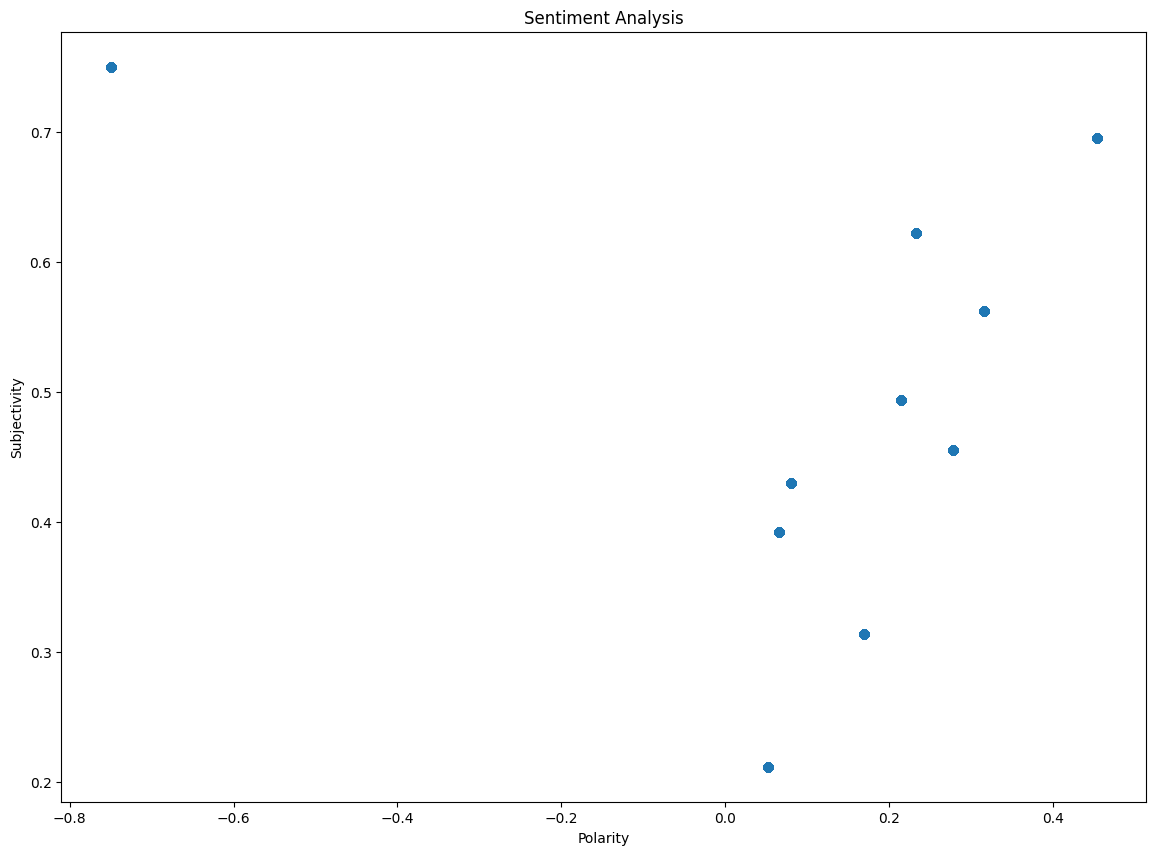

In [171]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [172]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,need good phone good battery life bloat free s...,if need good phone good battery life bloat fre...,"[need, good, phone, good, battery, life, bloat...",0.430128,0.080769,pos
1,recently upgraded oneplus nord ce lite g paste...,i recently upgraded oneplus nord ce 3 lite 5g ...,"[recently, upgraded, oneplus, nord, ce, lite, ...",0.561937,0.316441,pos
2,went brand name slightly disappointed feature ...,"i went brand name, slightly disappointed. the ...","[went, brand, name, slightly, disappointed, fe...",0.392460,0.066270,pos
3,phone totally worthy best game camera quality ...,this phone totally worthy best games. but came...,"[phone, totally, worthy, best, game, camera, q...",0.314286,0.169048,pos
4,oneplus nord ce g device disappoint seamlessly...,the oneplus nord ce 3 5g device doesn’t disapp...,"[oneplus, nord, ce, g, device, disappoint, sea...",0.695455,0.453716,pos


# Story Generation and Visualization

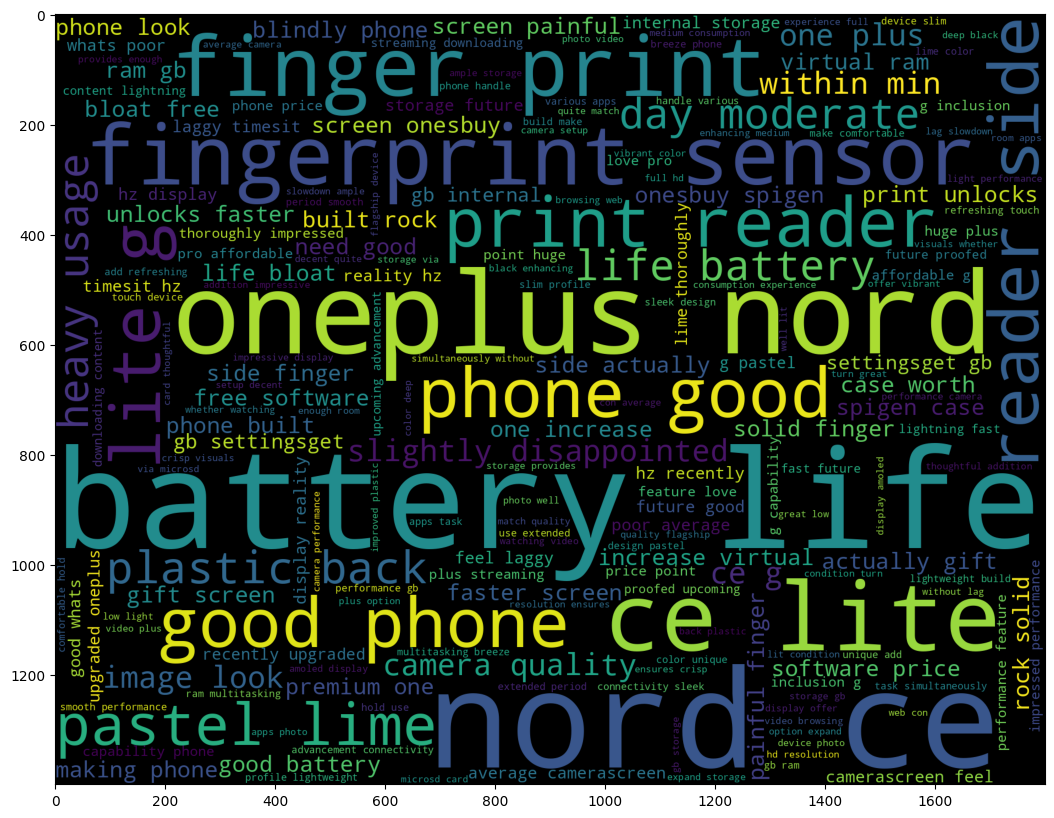

In [173]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

Most common words in positive Review

In [174]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

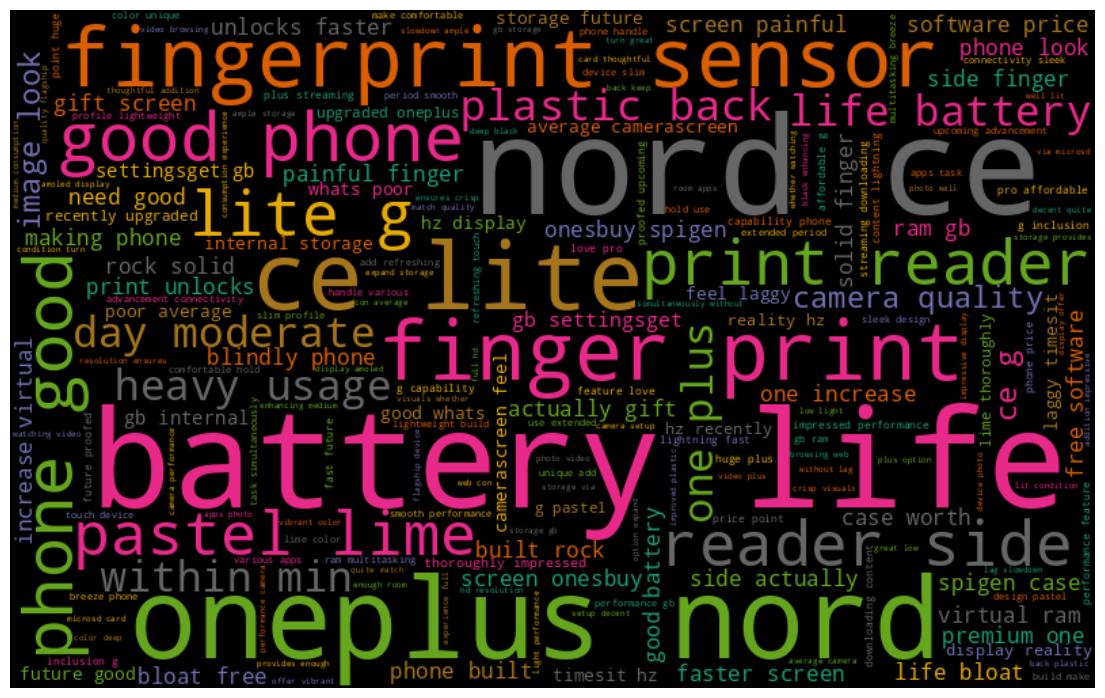

In [175]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

Most common words in negative Review

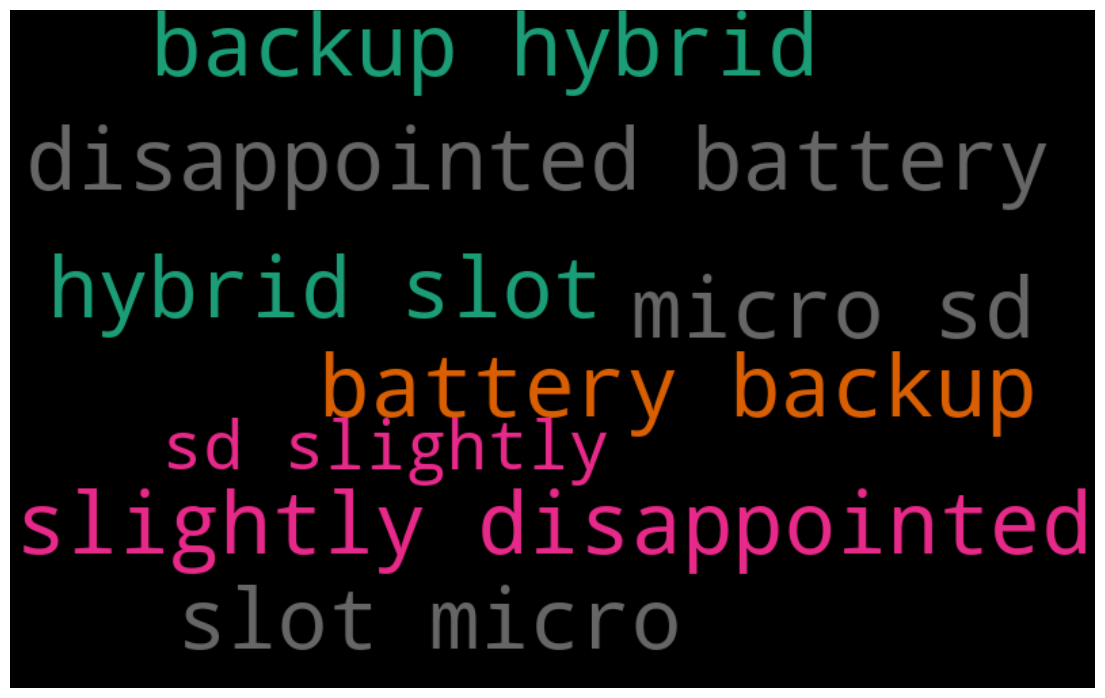

In [176]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)